## Data Preprocessing

Data set upload

In [1]:
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [2]:
upload = files.upload()

Saving test.csv to test.csv


Package import

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt

Data import

In [4]:
data = pd.read_csv('train.csv')

Initial data analysis

In [5]:
data.info

<bound method DataFrame.info of               date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]>

In [6]:
data.shape

(913000, 4)

In [7]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Monthly sales data 

In [8]:
m_data = data.copy()

In [9]:
m_data.date = m_data.date.apply(lambda x: str(x)[:-3])
m_data.head()

,date,store,item,sales
0,2013-01,1,1,13
1,2013-01,1,1,11
2,2013-01,1,1,14
3,2013-01,1,1,13
4,2013-01,1,1,10


In [10]:
m_data = m_data.groupby('date')['sales'].sum().reset_index()
m_data.head()

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242


In [11]:
m_data.date = pd.to_datetime(m_data.date)
m_data.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


**Exploratary data analysis**

Time duration of the data set

In [12]:
data_backup = data.copy()

In [13]:
data.date = pd.to_datetime(data.date)

In [14]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [15]:
days = data.date.max() - data.date.min()

In [16]:
days.days

1825

In [17]:
days.days/365 #years

5.0

Distribution of sales per day

[Text(0, 0.5, 'Sales Count'),
 Text(0.5, 0, 'Sales per day'),
 Text(0.5, 1.0, 'Distribution of sales per day')]

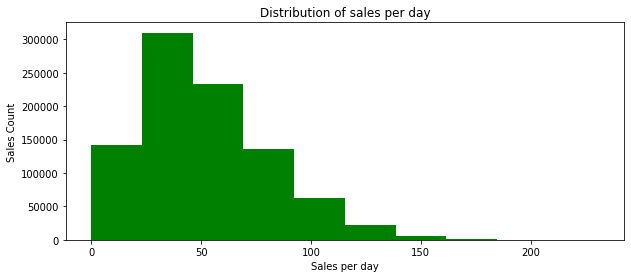

In [18]:
fig, axis = plt.subplots(figsize=(10,4))
plt.hist(data.sales, color='green')
axis.set(xlabel = "Sales per day", ylabel = "Sales Count", title = "Distribution of sales per day")

Distribution of sales per store

In [19]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [20]:
store_sales = data.groupby('store')['sales'].sum().reset_index()

In [21]:
store_sales.head()

,store,sales
0,1,4315603
1,2,6120128
2,3,5435144
3,4,5012639
4,5,3631016


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


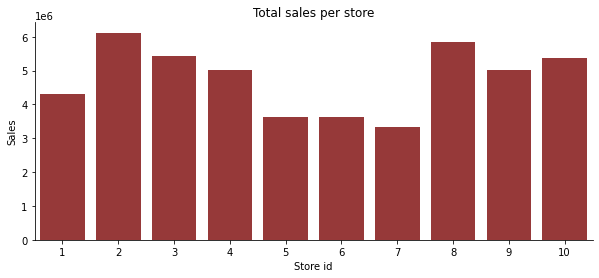

In [22]:
fig, axis = plt.subplots(figsize=(10,4))
sns.barplot(store_sales.store, store_sales.sales, color='brown')
axis.set(xlabel = "Store id", ylabel = "Sales", 
         title = "Total sales per store")
sns.despine()

**Average monthly sales**

Overall average monthly sales

In [23]:
m_data.sales.mean()

795075.2

Average monthly sales considering the last 12 month 

In [24]:
m_data.sales[-12:]

48     617306
49     621369
50     822667
51     938862
52    1020686
53    1064624
54    1171393
55    1026403
56     935263
57     891160
58     928837
59     695170
Name: sales, dtype: int64

In [25]:
m_data.sales[-12:].mean()

894478.3333333334

Analyse stationary in the data

In [26]:
def time_plot(data, x_col, y_col, title):
    fig, axis = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=axis, color='blue', label='Total Sales')
    
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot((second.date + datetime.timedelta(6*365/12)), 
                 y_col, data=second, ax=axis, color='red', 
                 label='Mean Sales')   
    
    axis.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


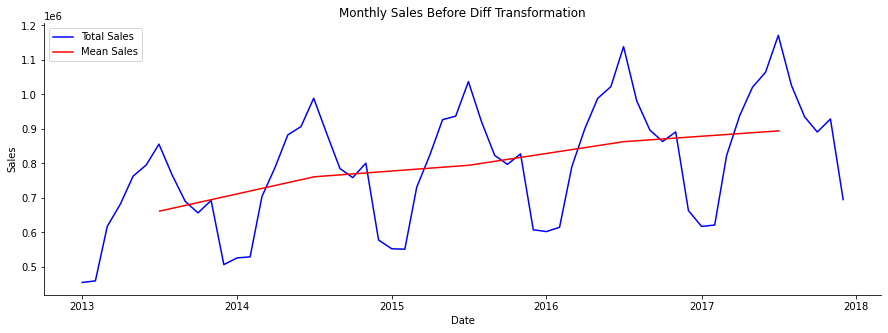

In [27]:
time_plot(m_data, 'date', 'sales', 'Monthly Sales Before Diff Transformation')

Apply differencing transformation

In [28]:
stationary_data = m_data.copy()
stationary_data['sales_diff'] = stationary_data.sales.diff()
stationary_data = stationary_data.dropna()
stationary_data.to_csv('stationary_data.csv')

In [29]:
stationary_data.head()

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


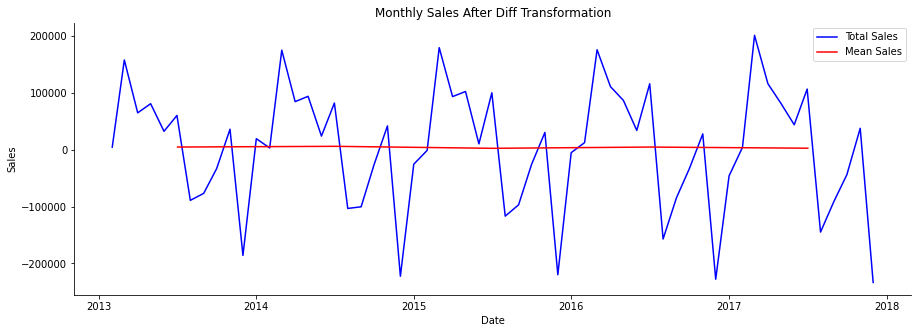

In [30]:
time_plot(stationary_data, 'date', 'sales_diff', 'Monthly Sales After Diff Transformation')

Analyze lags


 Convert dataframe to datetime index

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


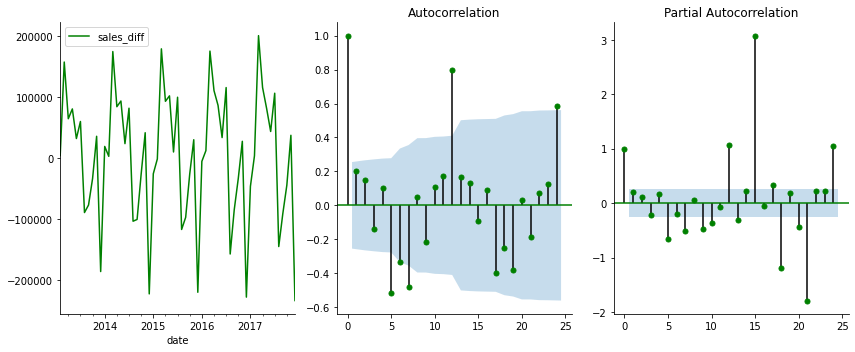

In [32]:
lags =24
di_data = stationary_data.set_index('date').drop('sales', axis=1)
di_data.dropna(axis=0)

layout = (1, 3)
raw  = plt.subplot2grid(layout, (0, 0))
auto_cf  = plt.subplot2grid(layout, (0, 1))
partial_cf = plt.subplot2grid(layout, (0, 2))

di_data.plot(ax=raw, figsize=(12, 5), color='green')
smt.graphics.plot_acf(di_data, lags=lags, ax=auto_cf, color='green')
smt.graphics.plot_pacf(di_data, lags=lags, ax=partial_cf, color='green')
sns.despine()
plt.tight_layout()

Dataset Preperation

Regressive model dataset


In [33]:
# rm_data - regressive modeling data
rm_data = stationary_data.copy()
    
#create column for each lag
for i in range(1,13):
    col_name = 'lag_' + str(i)
    rm_data[col_name] = rm_data['sales_diff'].shift(i)

#drop null
rm_data = rm_data.dropna().reset_index(drop=True)

rm_data.to_csv('rm_data.csv', index=False)

In [34]:
rm_data.head()

,date,sales,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2014-02-01,529117,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,2014-03-01,704301,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,2014-04-01,788914,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,2014-05-01,882877,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,2014-06-01,906842,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0


In [42]:
rm_data.shape

(47, 15)

ARIMA model dataset

In [44]:
a_data = stationary_data.copy()

In [45]:
a_data = a_data.set_index('date').drop('sales', axis=1)
a_data.dropna(axis=0)
a_data.to_csv('a_data.csv')

In [39]:
a_data.head()

,sales_diff
date,
2013-02-01,4513.0
2013-03-01,157965.0
2013-04-01,64892.0
2013-05-01,80968.0
2013-06-01,32355.0


In [46]:
a_data.shape

(59, 1)

End